In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [34]:
lr = input("What is lr?(01/001)")
print(f"lr is .{lr}")

lr is .01


In [35]:
test = pd.read_csv(f"./tcr_{lr}/test.csv",delimiter='\t',header=None)
y = test[2]
y_pred = test[3]


In [36]:
test_acc = accuracy_score(y, y_pred)
round(test_acc ,7)

0.7163553

In [37]:
val = pd.read_csv(f'./tcr_{lr}/val.csv',delimiter='\t',header=None)
y = val[2]
y_pred = val[3]

In [38]:
val_acc = accuracy_score(y, y_pred)
round(val_acc,7)

0.7004288

In [39]:
train_results = pd.read_csv(f'./tcr_{lr}/train.csv',delimiter='\t',header=None)
(train_results.head(3))
# Loss  Accuracy Precision1 Precision0 Recall1 Recall0 F1Macro F1Micro AUC

,0,1,2,3,4,5,6,7,8
0,23449.8580,0.6516,0.7155,0.6182,0.4943,0.8064,0.6423,0.6516,0.7259
1,22111.2693,0.6821,0.7124,0.6602,0.6027,0.7604,0.6799,0.6821,0.7546
2,22793.6965,0.6695,0.7492,0.6297,0.5018,0.8345,0.6594,0.6695,0.7410


In [40]:
accuracy = train_results[1]
accuracy.mean()

np.float64(0.6999200000000001)

In [41]:
# loss = train_results[0]
# accuracy = train_results[1]
# precision1 = train_results[2]     #training 
# precision0 = train_results[3]     # test
# recall1 = train_results[4]
# recall0 = train_results[5]
# f1macro = train_results[6]
# f1micro = train_results[7]
# auc = train_results[8]

In [42]:
def visualize_metrics(train_results):
    
    # loss, accuracy, precision_train, precision_val, recall_train, recall_val, f1macro, f1micro, auc = train_results
    # train_results
    loss = train_results[0]
    #reverse loss
    print(type(loss))
    print(loss[0])
    print("\n\n\n")
    losss = loss.iloc[::-1]
    print(losss[0])
    accuracy = train_results[1]
    precision_train = train_results[2]
    precision_val = train_results[3]
    recall_train = train_results[4]
    recall_val = train_results[5]
    f1macro = train_results[6]
    f1micro = train_results[7]
    auc = train_results[8]

    print("Average loss", round(losss.mean(),2))
    print("Average accuracy", round(accuracy.mean(),2))
    print("Average precision_train", round(precision_train.mean(),2))
    print("Average precision_val", round(precision_val.mean(),2))
    print("Average recall_train", round(recall_train.mean(),2))
    print("Average recall_val", round(recall_val.mean(),2))
    print("Average f1macro", round(f1macro.mean(),2))
    print("Average f1micro", round(f1micro.mean(),2))
    print("Average auc", round(auc.mean(),2))

    
    metrics = [
        ("Loss", [losss, None]),
        ("Accuracy", [accuracy, None]),
        ("Precision", [precision_train, precision_val]),
        ("Recall", [recall_train, recall_val]),
        ("F1", [f1macro, f1micro]),
        # ("F1 Micro", [f1micro, None]),
        ("AUC", [auc, None]),
    ]

    
    fig, axs = plt.subplots(len(metrics), 1, figsize=(10, len(metrics) * 3))

    for i, (metric_name, values) in enumerate(metrics):
        ax = axs[i] if len(metrics) > 1 else axs

        train_value, val_value = values
        if train_value is not None:
            ax.plot(train_value, label=f"Training {metric_name}", color="blue")

        
        if val_value is not None:
            ax.plot(val_value, label=f"Validation {metric_name}", color="orange")

        
        # ax.set_title(metric_name)
        ax.set_xlabel("Epochs")
        ax.set_ylabel(metric_name)
        ax.legend()
        ax.grid(True)

    
    plt.tight_layout()
    plt.savefig(f'tcr_{lr}/tcr_{lr}_metrics.png')                #for 01, due to early stoping, it stopped early
    plt.show()

<class 'pandas.core.series.Series'>
23449.858




23449.858
Average loss 22052.57
Average accuracy 0.7
Average precision_train 0.75
Average precision_val 0.67
Average recall_train 0.61
Average recall_val 0.79
Average f1macro 0.7
Average f1micro 0.7
Average auc 0.78


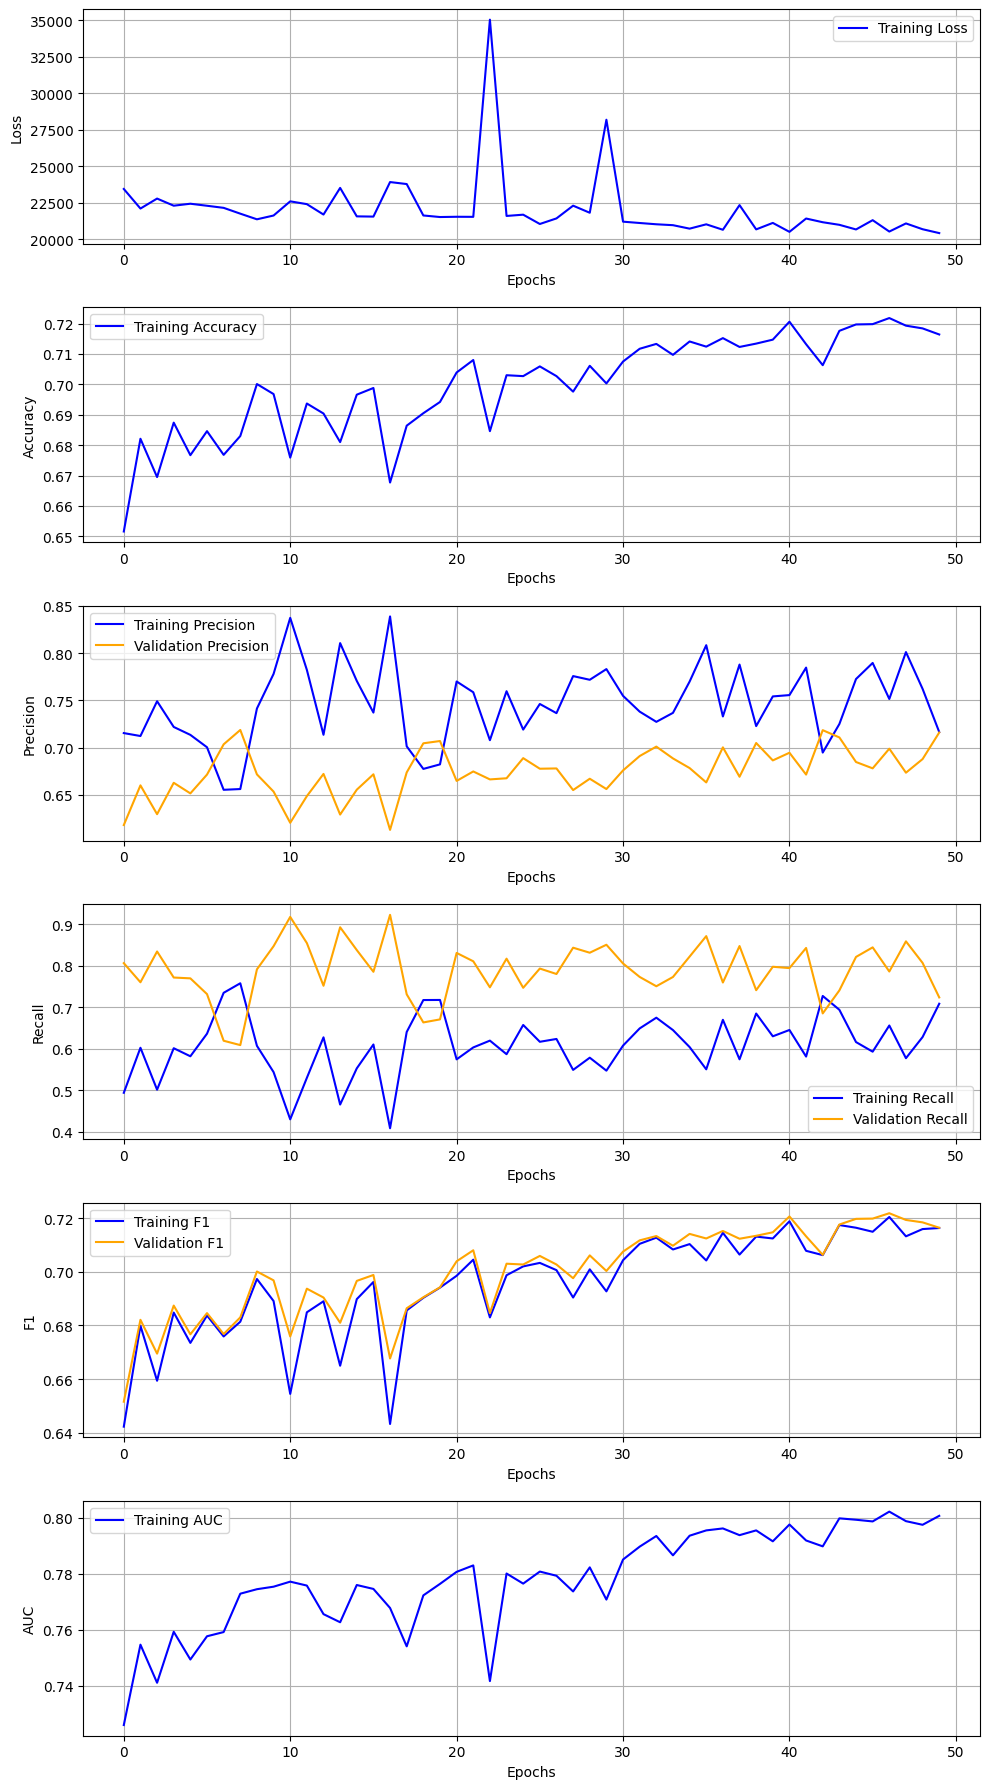

In [43]:
visualize_metrics(train_results)